분류 보고서:
              precision    recall  f1-score   support

       가짜 리뷰       0.99      0.98      0.98        96
       진짜 리뷰       1.00      1.00      1.00      1953
      체험단 리뷰       0.97      0.99      0.98       102

    accuracy                           1.00      2151
   macro avg       0.99      0.99      0.99      2151
weighted avg       1.00      1.00      1.00      2151



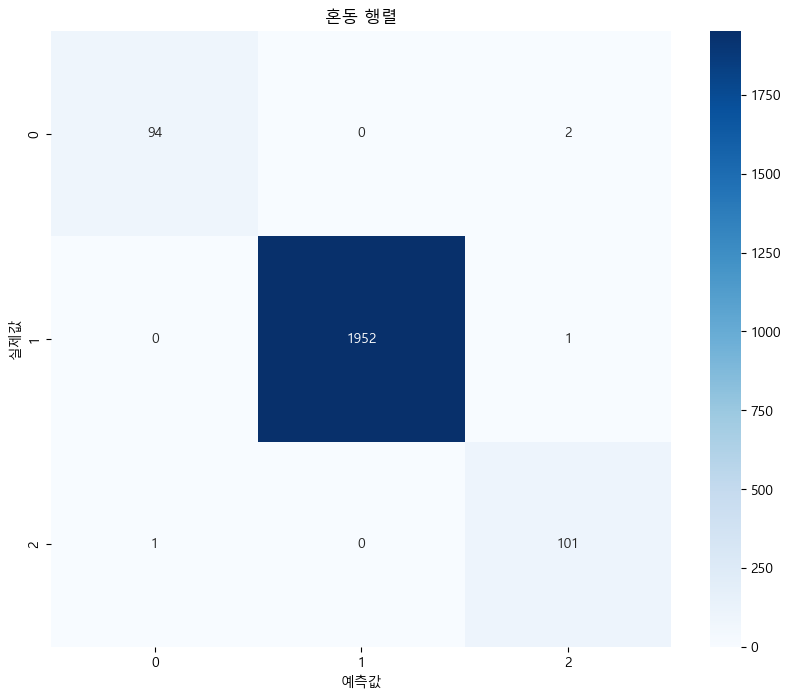

['feature_scaler.joblib']

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('labeled_reviews.csv', encoding='utf-8-sig')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'


# 특성 선택
features = ['text_length', 'word_count', 'emoticon_count', 
           'positive_score', 'negative_score', 'review_score']
X = df[features]
y = df['review_type']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM 모델 학습
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# 예측
y_pred = svm.predict(X_test_scaled)

# 성능 평가
print("분류 보고서:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

# 새로운 리뷰 예측을 위한 함수
def predict_review_type(review_features):
    # 특성 스케일링
    scaled_features = scaler.transform([review_features])
    # 예측
    prediction = svm.predict(scaled_features)
    # 예측 확률
    probabilities = svm.predict_proba(scaled_features)[0]
    return prediction[0], probabilities

# 모델 저장
import joblib
joblib.dump(svm, 'review_classifier_svm.joblib')
joblib.dump(scaler, 'feature_scaler.joblib')
